In [46]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

base_url = "https://books.toscrape.com/catalogue/page-{}.html"
book_data = []

# Rating mapping from word to number
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

# Loop through first 50 pages 
for page in range(1, 51):
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        title = book.h3.a['title']
        price = book.find("p", class_="price_color").text.replace('£', '')
        availability = book.find("p", class_="instock availability").text.strip()
        rating_class = book.find("p", class_="star-rating")['class'][1]
        rating = rating_map.get(rating_class, 0)

        book_data.append({
            "Title": title,
            "Price (£)": float(price),
            "Rating (1-5)": rating,
            "Availability": availability
        })

    time.sleep(1) 

# save the data into CSV file
df = pd.DataFrame(book_data)
df.to_csv("books_to_scrape.csv", index=False)
print("Scraping completed. Data saved to 'books_to_scrape.csv'")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

## Implementing Machine Learning model

In [49]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [51]:
df = pd.read_csv("books_to_scrape.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df = df.head(10)
print(df)

                                               Title  Price (£)  Rating (1-5)  \
0                               A Light in the Attic      51.77             3   
1                                 Tipping the Velvet      53.74             1   
2                                         Soumission      50.10             1   
3                                      Sharp Objects      47.82             4   
4              Sapiens: A Brief History of Humankind      54.23             5   
5                                    The Requiem Red      22.65             1   
6  The Dirty Little Secrets of Getting Your Dream...      33.34             4   
7  The Coming Woman: A Novel Based on the Life of...      17.93             3   
8  The Boys in the Boat: Nine Americans and Their...      22.60             4   
9                                    The Black Maria      52.15             1   

  Availability  
0     In stock  
1     In stock  
2     In stock  
3     In stock  
4     In stock  
5     

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [53]:
print(X_train)

[['A Light in the Attic' 51.77 3]
 ['Dear Mr. Knightley' 11.21 5]
 ['Two Boys Kissing' 32.74 2]
 ...
 ['Civilization and Its Discontents' 59.95 2]
 ['Modern Day Fables' 47.44 2]
 ['I am a Hero Omnibus Volume 1' 54.63 3]]


In [54]:
print(y_train)

['In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In stock'
 'In stock' 'In stock' 'In stock' 'In stock' 'In stock' 'In st

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         10 non-null     object 
 1   Price (£)     10 non-null     float64
 2   Rating (1-5)  10 non-null     int64  
 3   Availability  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes


In [56]:
df.describe()

,Price (£),Rating (1-5)
count,10.000000,10.000000
mean,40.633000,2.700000
std,14.801706,1.567021
min,17.930000,1.000000
25%,25.322500,1.000000
50%,48.960000,3.000000
75%,52.055000,4.000000
max,54.230000,5.000000


In [57]:
df.isnull()

,Title,Price (£),Rating (1-5),Availability
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [58]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report

In [60]:
# Step 2: Load Data
df = pd.read_csv('books_to_scrape.csv')
print(df.head())
print(df.info())

                                   Title  Price (£)  Rating (1-5) Availability
0                   A Light in the Attic      51.77             3     In stock
1                     Tipping the Velvet      53.74             1     In stock
2                             Soumission      50.10             1     In stock
3                          Sharp Objects      47.82             4     In stock
4  Sapiens: A Brief History of Humankind      54.23             5     In stock
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1000 non-null   object 
 1   Price (£)     1000 non-null   float64
 2   Rating (1-5)  1000 non-null   int64  
 3   Availability  1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB
None


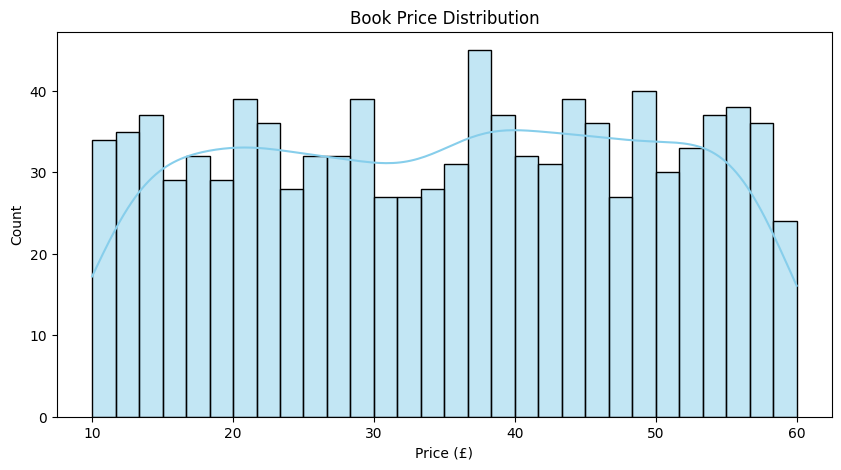

In [61]:
#Visualize Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price (£)'], bins=30, kde=True, color='skyblue')
plt.title("Book Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

C:\Users\91742\AppData\Local\Temp\ipykernel_6612\2526620150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating (1-5)', palette='viridis')


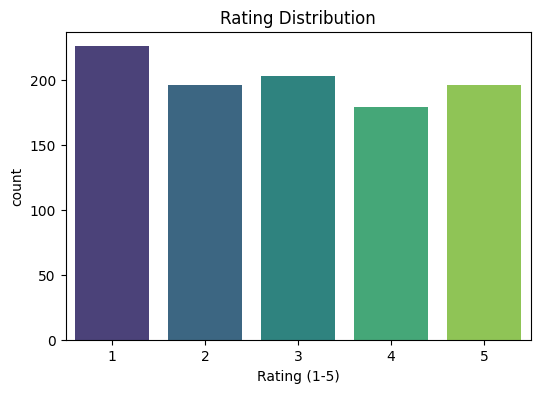

In [62]:
#Visualize Rating Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Rating (1-5)', palette='viridis')
plt.title("Rating Distribution")
plt.show()


In [63]:
#Regression - Predict Price from Rating
X = df[['Rating (1-5)']]
y = df['Price (£)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [64]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 211.45


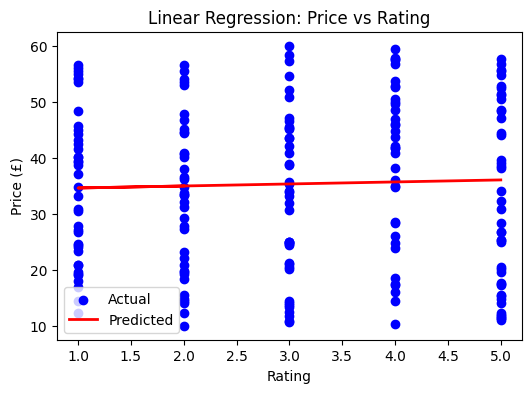

In [65]:
# Visualize
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Linear Regression: Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price (£)")
plt.legend()
plt.show()


In [66]:
#Classification - Predict Rating from Title (NLP)
X = df['Title']
y = df['Rating (1-5)']

In [67]:
# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [68]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.33      0.25        40
           2       0.23      0.29      0.26        38
           3       0.20      0.26      0.23        42
           4       0.25      0.08      0.12        36
           5       0.12      0.07      0.09        44

    accuracy                           0.20       200
   macro avg       0.20      0.21      0.19       200
weighted avg       0.20      0.20      0.19       200



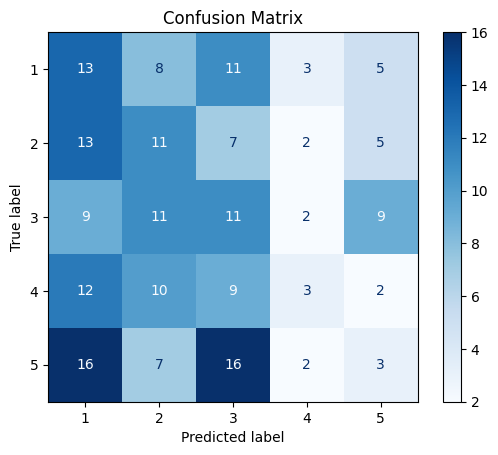

In [69]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
